# Regularização e Gradiente Descendente


## Introdução

Vamos iniciar essa lista com um pequeno tutorial sobre regressão, atributos polinomiais e regularização em uma base de dados bem simples contendo uma coluna de variáveis `x` e um valor `y` associado. A base de dados é chamada de `X_Y_Sinusoid_Data.csv`. 

## Exercício 1

* Importe a base de dados. 
* Gere aproximadamente  100 pontos x na faixa de 0 a 1 utilizando a função `linspace` do `numpy`. Usando esses pontos, calcule o ponto y representando o valor verdadeiro a partir da equação: $y = sin(2\pi x)$

* Plote a base e `x` vs `y` da base e o gerado.


In [1]:
import pandas as pd
import numpy as np

filepath = 'data/X_Y_Sinusoid_Data.csv'
data = pd.read_csv(filepath)

X_real = np.linspace(0,1,100)
Y_real = np.sin(2*np.pi*X_real)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

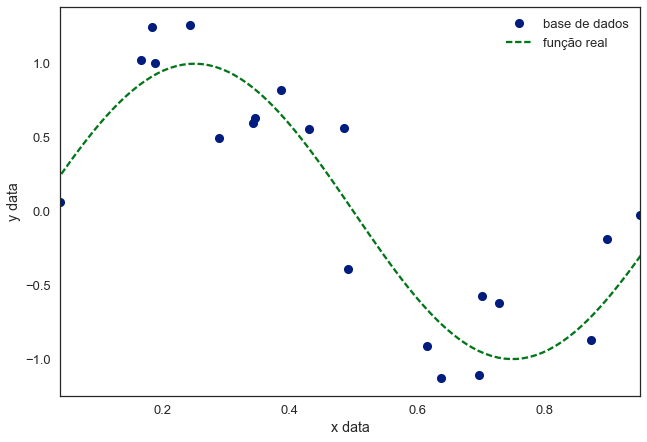

In [3]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot of the noisy (sparse)
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='base de dados')
ax.plot(X_real, Y_real, ls='--', marker='', label='função real')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');

## Exercício 2


* Usando a classe `PolynomialFeatures` da biblioteca de pré-processamento do Scikit-learn's, crie atributos polinomiais de ordem 20.
* Crie um modelo de regressão linear. 
* Plote o valor predito com o valor calculado.

Note que `PolynomialFeatures` requer um dataframe com 1 coluna ou uma array bidimensional de dimensão (`n`, 1), com `n` sendo o número de amostras.

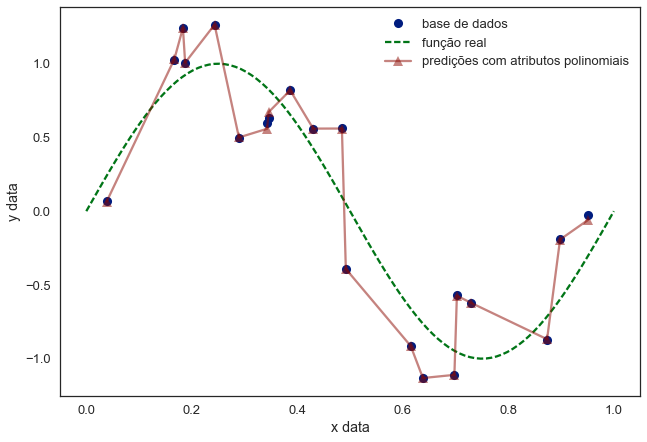

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extraindo x e y da base de dados no formato correto
X_data = data[['x']]
Y_data = data['y']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='base de dados', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='função real')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predições com atributos polinomiais')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');



## Exercício 3

* Repita o experimento anterior utilizando ridge regression ($\alpha$=0.001) e lasso regression ($\alpha$=0.0001). 
* Plote os resultados.
* Em seguida vamos plotar a magnitude dos coefientes dos modelos para comparação.

O que a diferença entre as magnitudes te diz sobre a regularização?

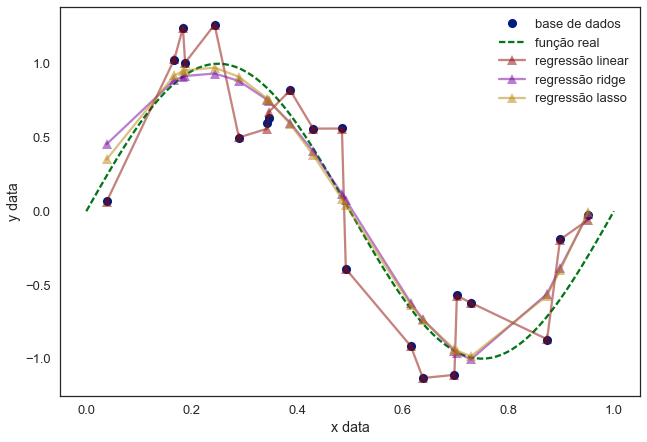

In [29]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# Crie o modelo Ridge
rr = Ridge(alpha=0.001)
rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# Crie o modelo Lasso
lassor = Lasso(alpha=0.0001)
lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# Vamos plotar as predições
plt.plot(X_data, Y_data, marker='o', ls='', label='base de dados')
plt.plot(X_real, Y_real, ls='--', label='função real')
plt.plot(X_data, Y_pred, label='regressão linear', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='regressão ridge', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='regressão lasso', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [30]:
# Vamos examinar os coeficientes gerados pelos modelos
# .ravel() retorna uma array multidimensional concatenada em uma dimensão (flattened)



coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Diferença enorme da escala da regressão linear e das regularizações

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.777551e+13,2.169397,2.167284
std,6.031941e+13,2.900278,4.706731
min,1.619371e+07,0.000000,0.000000
25%,3.416390e+12,0.467578,0.000000
50%,3.621188e+13,1.017272,0.252181
75%,1.070540e+14,2.883507,1.641353
max,1.655347e+14,12.429635,20.176708


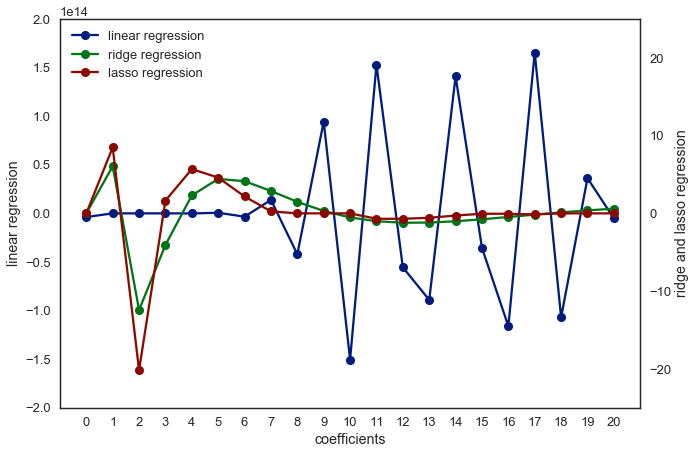

In [31]:
colors = sns.color_palette()

# Vamos criar dois eixos, um para regressão linear outro para as regularizações
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plotar a regressão linear
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plotar as regularizações no outro eixo
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Alterar as escalas
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combinar as legendas
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

## Exercício 4

Para os próximos exercícios vamos utilizar a base de dados da atividade anterior sobre o preço dos imóveis.

Para começar:

* Importe os dados com Pandas e aplique o one-hot-encoding nas variáveis categóricas, vamos utilizar o método `.get_dummies`. 
* Divida a base entre treino e teste. 
* Aplique a função de transformação Log nos atributos com viés. 

In [92]:
filepath = 'data/Ames_Housing_Sales.csv'
data1 = pd.read_csv(filepath, sep=',')
data = data1.dropna()
data.shape

(1379, 80)

Crie uma lista de atributos categóricos e aplique o método `get_dummies` para gerar os atributos one-hot-encoding.

In [93]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields
#print(data.head(3))
# Primeiro devemos marcar cada coluna como categórico com pd.Categorical()
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

# Agora aplicamos o método get_dummies() nas nossas colunas categóricas
data = pd.get_dummies(data)
data.head(3)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,1,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,1,0,1,1,0


Agora, vamos dividir a base entre treino e teste, use `test_size=0.3` e `random_state=42`:

In [94]:
from sklearn.model_selection import train_test_split

y_col = data['SalePrice']
x_cols = [col for col in data.columns if col!=y_col.name]
train, test = train_test_split(data,test_size = 0.3, random_state=42)



Alguns atributos possuem valores enviesados--uma transformação log pode ajudar a aliviar essa situação. Vamos alterar esses atributos, exceto pelo `SalePrice` que é nossa variável alvo.

In [95]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]

In [96]:
skew_limit = 0.75
skew_vals = train[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols
print(train[float_cols].head(4))


      1stFlrSF  2ndFlrSF  3SsnPorch  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
461      630.0       0.0        0.0       515.0         0.0      115.0   
976      845.0       0.0        0.0         0.0         0.0        0.0   
1128     728.0     728.0        0.0         0.0         0.0      728.0   
904      561.0     668.0        0.0       285.0         0.0      276.0   

      EnclosedPorch  GarageArea  GarageYrBlt  GrLivArea    ...      \
461             0.0       286.0       1970.0      630.0    ...       
976             0.0       290.0       1957.0      845.0    ...       
1128            0.0       400.0       2005.0     1456.0    ...       
904             0.0       462.0       1980.0     1229.0    ...       

      LotFrontage  LowQualFinSF  MasVnrArea  MiscVal  OpenPorchSF  PoolArea  \
461     21.000000           0.0         0.0      0.0          0.0       0.0   
976     59.911111           0.0         0.0      0.0          0.0       0.0   
1128    51.000000           0.0         0

Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

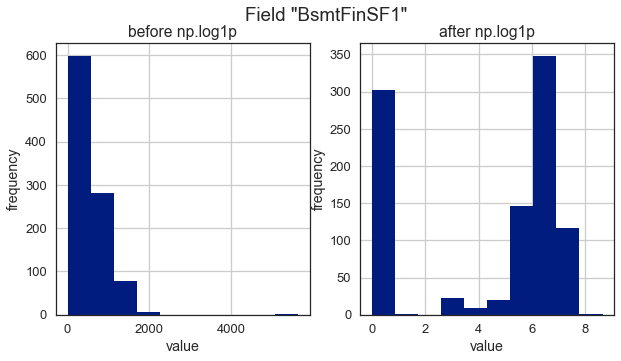

In [97]:
# OPTIONAL: Let's look at what happens to one of these features, when we apply np.log1p visually.

field = "BsmtFinSF1"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));
# a little bit better

In [98]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    # aplique a função np.log1p nessa variável
    train[col] = train[col].apply(np.log1p)
    test[col]  = test[col].apply(np.log1p)


Vamos separar os atributos do preditor

In [99]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']


X_test  = test[feature_cols]
y_test  = test['SalePrice']



## Exercício 5

* Escreva a função **`rmse`**  que recebe valores reais da variável alvo e os peditos pelo modelo e retorna a raiz quadrada do erro quadrático médio. Use a função `mean_squared_error` do sklearn.  


In [100]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return mean_squared_error(ytrue, ypredicted)

* Aplique um modelo básico de regressão linear
* imprima o rmse do modelo
* plot os valores preditos vs reais baseado no modelo.  

In [101]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)


y_pred = linearRegression.predict(X_test)

linearRegression_rmse = rmse(y_test, y_pred)

print(linearRegression_rmse)

93862382920.8


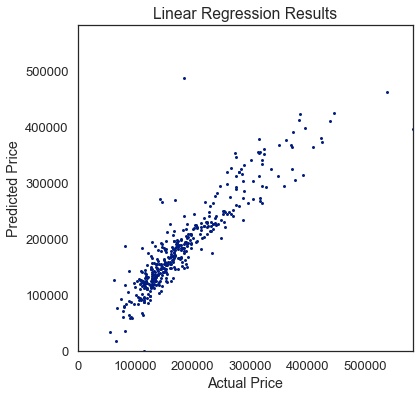

In [102]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

## Exercício 6

A regressão Ridge usa a regularização do tipo L2 para reduzir a magnitude dos coeficientes. Isso é especialmente útil quando temos uma variância muito alta. O Scikit-Learn possui esse modelo na classe `Ridge` e uma versão que aplica validação cruzada para determinar o melhor valor de $\alpha$ na classe `RidgeCV`.

* Utilize a classe `Ridge` e determine o melhor valor de $\alpha$ dentre os valores $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ e plote o RMSE vs $\alpha$.

In [103]:
from sklearn.linear_model import Ridge



Agora repita o experimento utilizando RidgeCV, note que esse modelo retorna apenas o melhor $\alpha$:


In [109]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

15 1034855897.75
True


## Exercício 7

Agora utilizaremos o `LassoCV` para aplicar a regularização L1 que tenta reduzir o máximo de coeficientes para zero, fazendo uma espécie de seleção de atributos.

Além disso, temos a classe `ElasticNetCV` que combina as regularizações L1 e L2.

* Use o `LassoCV` e determine o $\alpha$ ótimo e o RMSE do modelo gerado. 
* Repita com o modelo Elastic Net
* Compare os resultados com tabelas ou plotagens

Use os $\alpha$:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [108]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse) 

0.0005 1541142983.0


Vamos verificar quantos coeficientes são iguais a zero:

In [110]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 294 coefficients, 273 are non-zero with Lasso.


Agora teste o elastic net com os mesmos alphas de Lasso e l1_ratios entre 0.1 e 0.9

In [111]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.1 1225086402.25


Vamos comparar os resultados com uma tabela:

In [112]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,9.386238e+10
Ridge,1.034856e+09
Lasso,1.541143e+09
ElasticNet,1.225086e+09


Alternativamente podemos fazer um plot do valor real vs predito para cada modelo.

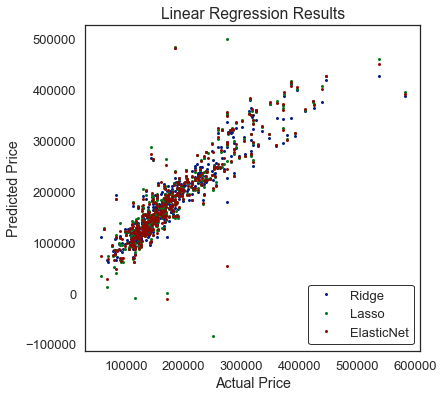

In [113]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

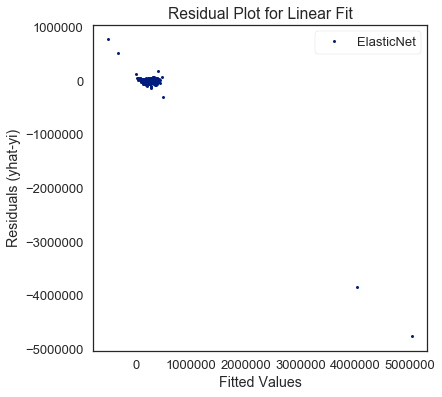

In [122]:
# Plotting residuals vs Fitted values
f = plt.figure(figsize=(6,6))
ax = plt.axes()

residuals = y_test-y_pred
fitted = X_test

ax.plot(y_pred,residuals, marker='o', ls='',ms=3.0, label=lab)
eg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Fitted Values', 
       ylabel='Residuals (yhat-yi)', 
       title='Residual Plot for Linear Fit');
